Hola **Estela**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por mantener esta sección introductoria ya que ayuda a entender el que y cómo de tu proyecto antes de revisar cada celda, te animo a mantener esta buena práctica!
</div>

## Preparación

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])



In [3]:
data

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
data

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [6]:
#revisamos que las fechas estén en orden
data.index.is_monotonic

True

In [7]:
#Remuestreo por una hora
data = data.resample('1H').median()


In [8]:
#crear media movil con una ventana de 24hrs utilizando el valor actual de una fila
data['rolling_mean'] = data['num_orders'].shift().rolling(24).mean()

In [9]:
data.sample(3)

,num_orders,rolling_mean
datetime,,
2018-08-28 18:00:00,18.5,22.916667
2018-08-25 04:00:00,33.0,23.875000
2018-03-22 19:00:00,8.5,9.125000


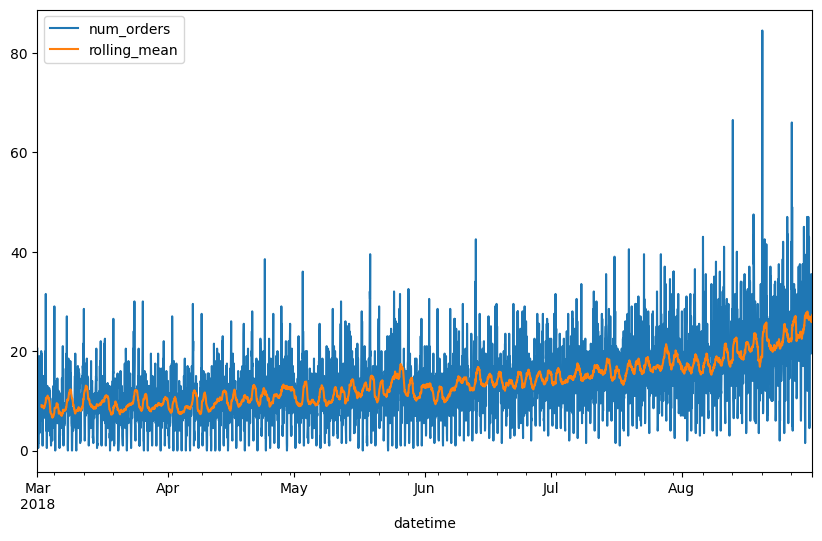

In [10]:
data.plot(figsize=(10,6))
plt.show()

In [11]:
data_diff = data - data.shift(1)

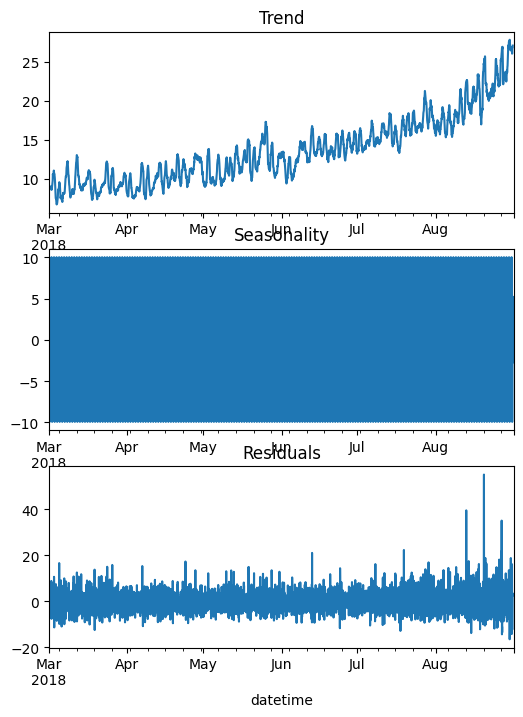

In [12]:
#gráficamos para obervar tendencia, estacionalidad y residuos

plt.figure(figsize=(6, 8))  

plt.subplot(311) 
seasonal_decompose(data['num_orders']).trend.plot(ax=plt.gca()) 
plt.title('Trend')  

plt.subplot(312)  
seasonal_decompose(data['num_orders']).seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')  

plt.subplot(313)  
seasonal_decompose(data['num_orders']).resid.plot(ax=plt.gca())  
plt.title('Residuals') 

plt.show()

En la gráfica de tendencia se oberva un crecimiento con los meses, lo cual es esperado ya que conforme se conoce más la empresa aunmentan los viajes

En la grafica de estacionalidad, por el momento no sepiuede obsevar que exista alguna estacion cón mayor número de viajes, sin embargo, necesitamos más tiempo para que se pueda obervar mejor. 

La gráfica de residuos tiene un patrón muy similar, hasta agosto empieza a haber una diferencia, lo cual puede ser que tardó en empezar a predecir correctamente el modelo

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, realizaste las gráficas correctas para el análisis de datos temporales y planteaste un comentario acertado sobre lo que se puede observar
</div>

In [13]:
data.groupby(data.index.hour)['num_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
datetime,,,,,,,,
0,184.0,23.608696,8.210791,6.5,17.375,22.50,28.000,47.5
1,184.0,16.510870,8.231447,3.0,11.000,15.00,19.625,48.0
2,184.0,18.304348,11.316354,2.0,10.000,17.00,24.000,84.5
3,184.0,16.442935,7.406854,3.0,10.500,15.50,20.500,43.5
4,184.0,13.932065,8.795305,0.5,6.500,13.25,19.000,49.0
5,184.0,6.103261,4.505333,0.0,2.000,5.00,9.125,19.5
6,184.0,3.701087,3.536739,0.0,1.000,2.50,5.500,16.0
7,184.0,4.239130,2.852454,0.0,2.000,3.50,6.000,15.0
8,184.0,11.940217,3.891874,4.0,9.500,11.50,14.125,27.0


In [14]:
data_diff = data - data.shift(1)

## Análisis

In [15]:
# Características para distintos priodos de tiempo   
data['month'] = data.index.month
data['day'] =   data.index.day
data['dayofweek'] = data.index.dayofweek
data['hour'] =  data.index.hour

In [16]:
#desfase máximo
max_lag = 5

# Crear características de desfase
for lag in range(1, max_lag + 1):
    data['lag_{}'.format(lag)] = data['num_orders'].shift(lag) 

In [17]:
data

,num_orders,rolling_mean,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5
datetime,,,,,,,,,,,
2018-03-01 00:00:00,20.5,NaN,3,1,3,0,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,14.5,NaN,3,1,3,1,20.5,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,10.0,NaN,3,1,3,2,14.5,20.5,NaN,NaN,NaN
2018-03-01 03:00:00,9.0,NaN,3,1,3,3,10.0,14.5,20.5,NaN,NaN
2018-03-01 04:00:00,4.0,NaN,3,1,3,4,9.0,10.0,14.5,20.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,23.5,26.354167,8,31,4,19,34.0,35.5,33.0,19.5,21.0
2018-08-31 20:00:00,26.0,26.833333,8,31,4,20,23.5,34.0,35.5,33.0,19.5
2018-08-31 21:00:00,27.0,26.937500,8,31,4,21,26.0,23.5,34.0,35.5,33.0


## Formación

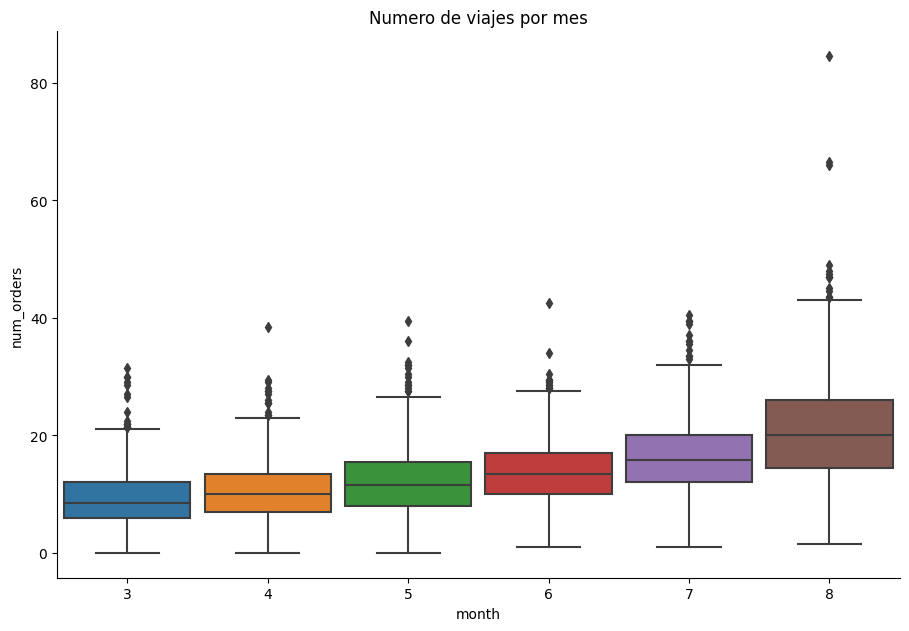

In [18]:
sns.catplot(x="month", y="num_orders", kind="box", data=data, width=0.9, height=6, aspect=1.5)
plt.title("Numero de viajes por mes")
plt.show()

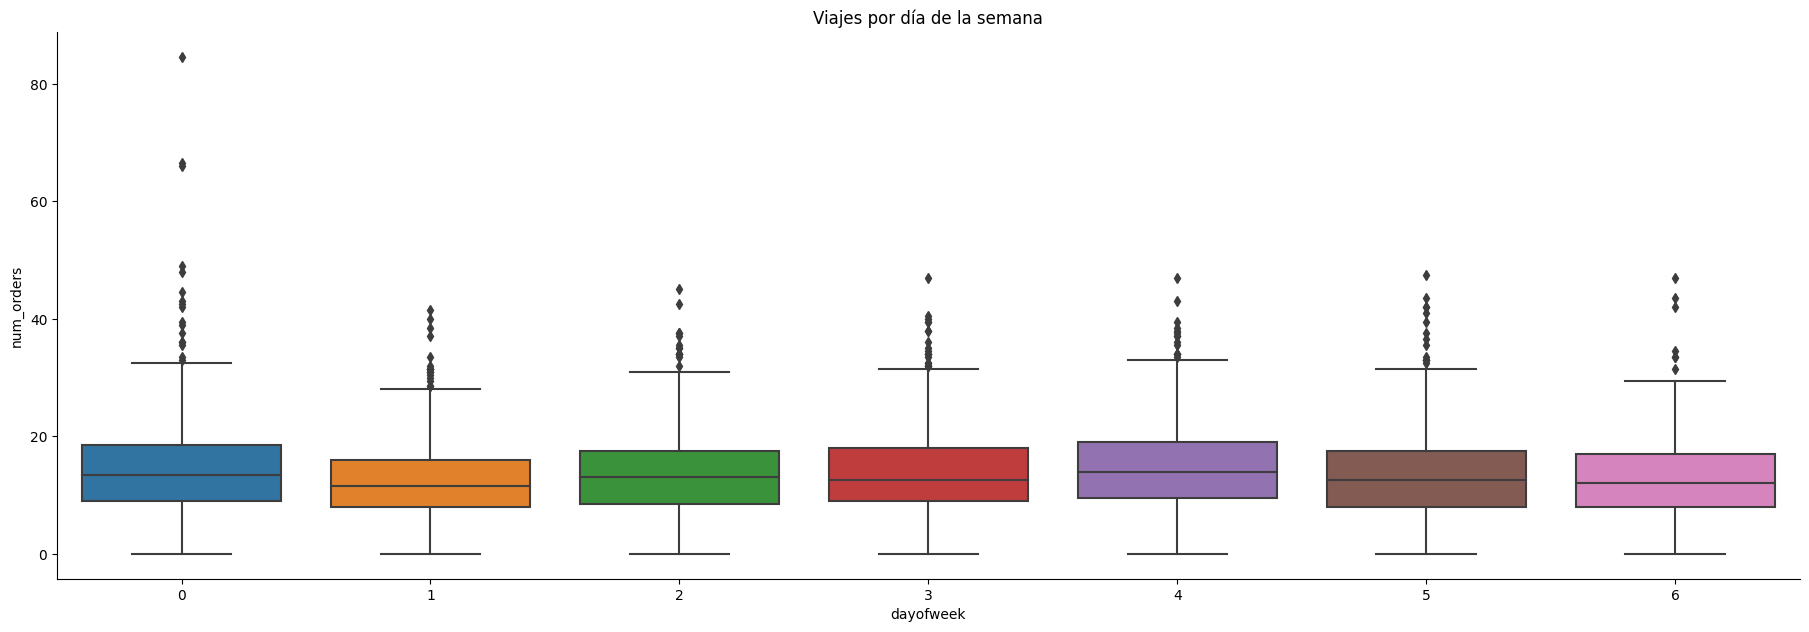

In [19]:
sns.catplot(x="dayofweek", y="num_orders", kind="box", data=data, width=0.8, height=6, aspect=3)
plt.title("Viajes por día de la semana")
plt.show()

En las gráficas de caja podemos observar que la cantidad de viajes aumentan cada mes, lo que es esperado ya que la empresa se va dando a conocer poco a poco. Sin embargo en cuanto a los días de la semana la cantidad mde viajes es muy similar, excepto el día 0 o lunes que hay más valores atípicos que en los otros días. Tendriamos que esperar más tiempo para obtener más datos y ver si algun día de la semana hay más demanda de taxis. 

## Prueba

In [20]:

random_state = 42
time_series = TimeSeriesSplit(n_splits = 3) 

In [21]:
#Separamos datos de prueba y entranemianto
train, test = train_test_split(data_diff, shuffle=False, test_size=0.2)
valid, test = train_test_split(test, shuffle=False, test_size=0.5)
train.dropna(inplace=True) 

X_train = train.drop(columns='num_orders')
y_train = train.num_orders

X_valid = valid.drop(columns='num_orders')
y_valid = valid.num_orders 

X_test = test.drop(columns='num_orders')
y_test = test.num_orders

/tmp/ipykernel_83/1586694122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, dividiste los datos en los sets necesarios y extrajiste características extra para darle más información al modelo, esto es un paso importante para asegurar un correcto desempeño
</div>

In [22]:
print('train shape: ', X_train.shape)
print('test shape: ', X_test.shape)

train shape:  (3507, 1)
test shape:  (442, 1)


In [23]:
#Revisamos la secuencia de fechas entre el conjunto de entrenamiento y de prueba
print('fecha del conjunto de entrenamiento: ', 'min:', X_train.index.min(),' max: ', X_train.index.max()) 
print('fecha del conjunto de prueba:        ', 'min:', X_test.index.min(), ' max: ', X_test.index.max()) 

fecha del conjunto de entrenamiento:  min: 2018-03-02 01:00:00  max:  2018-07-26 03:00:00
fecha del conjunto de prueba:         min: 2018-08-13 14:00:00  max:  2018-08-31 23:00:00


###  Regresión lineal 

In [24]:
print(data.isna().sum())
print(np.isinf(data).sum())

num_orders       0
rolling_mean    24
month            0
day              0
dayofweek        0
hour             0
lag_1            1
lag_2            2
lag_3            3
lag_4            4
lag_5            5
dtype: int64
num_orders      0
rolling_mean    0
month           0
day             0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
lag_5           0
dtype: int64


In [25]:
print('Mediana de pedidos de taxis por hora (cantidad real):',data['num_orders'].median())
print()
print('Mediana de pedidos de taxis por hora (media movil):',data['rolling_mean'].median())

Mediana de pedidos de taxis por hora (cantidad real): 12.5

Mediana de pedidos de taxis por hora (media movil): 12.9375


## Lineal Regression Model

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_valid)
rmse_lr = mean_squared_error(y_valid, y_pred_lr, squared=False)

print(f'Linear Regression RMSE: {rmse_lr:.2f}')

Linear Regression RMSE: 7.57


## Decision Tree Model

In [27]:
# create the decision tree model
dt = DecisionTreeRegressor(random_state=random_state)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8, 10],
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(
    dt, 
    param_grid, 
    cv=time_series, 
    scoring='neg_root_mean_squared_error', 
    verbose=1, n_jobs=-1,
    )
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params_dt = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

# predicción en conjunto de validación y RMSE
print(f'Mejores hiperparamtros: {best_params_dt}')
y_pred_dt = best_dt_model.predict(X_valid)
rmse_dt = mean_squared_error(y_valid, y_pred_dt, squared=False)
print(f'Decision Tree RMSE: {rmse_dt:.2f}')

Fitting 3 folds for each of 140 candidates, totalling 420 fits
Mejores hiperparamtros: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree RMSE: 7.56


## Random Forest Model

In [28]:
# create the random forest model
rf = RandomForestRegressor(random_state=random_state)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [3, 5, 8, 10],
    'max_depth': [8, 14, 16],
    'min_samples_split': [3, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=time_series 
    )
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params_rf = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# predicción en conjunto de validación y RMSE
print(f'Mejores hiperparámetros son: {best_params_rf}')
y_pred_rf = best_rf_model.predict(X_valid)
rmse_rf = mean_squared_error(y_valid, y_pred_rf, squared=False)
print(f'Random Forest RMSE: {rmse_rf:.2f}')

Mejores hiperparámetros son: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 10}
Random Forest RMSE: 7.54


## LightGBM Model

In [29]:
# lightGBM 
model_lgbm = LGBMRegressor(force_row_wise=True, verbosity=-1, random_state=random_state)

# hiperparámetros
param_grid = {
    'max_depth': [5, 10,15],
    'num_leaves': [10, 20, 30, 40],
    'min_child_samples': [5, 10, 15, 20],
    'learning_rate': [0.05, 0.1, 0.2],
}


grid_search = GridSearchCV(
    model_lgbm, 
    param_grid, 
    cv=time_series,
    scoring='neg_root_mean_squared_error', 
    verbose=1, n_jobs=-1,
)
grid_search.fit(X_train, y_train)

best_params_lgbm = grid_search.best_params_
best_lgbm_model = grid_search.best_estimator_

# predicción en conjunto de validación y RMSE
print(f'Mejores hiperparametros son: {best_params_lgbm}')
y_pred_lgbm = best_lgbm_model.predict(X_valid)
rmse_lgbm = mean_squared_error(y_valid, y_pred_lgbm, squared=False)
print(f'LightGBM RMSE: {rmse_lgbm:.2f}')

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Mejores hiperparametros son: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 20, 'num_leaves': 10}
LightGBM RMSE: 7.56


## XGBoost Model

In [ ]:
#xgboost model
model_xgb = XGBRegressor(random_state=random_state, verbosity=0)

#hiperparámetros
param_grid = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [5, 8, 10],
    'min_child_weight': [1, 5, 10]
}

#  grid para mejores hiperparámetros
grid_search = GridSearchCV(
    model_xgb, 
    param_grid, 
    cv=time_series, 
    scoring='neg_root_mean_squared_error', 
    verbose=1, n_jobs=-1,
)
grid_search.fit(X_train, y_train)


best_params_xgb = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# predicción en conjunto de validación y RMSE
print(f'Best XGBoost hyperparameters: {best_params_xgb}')
y_pred_xgb = best_xgb_model.predict(X_valid)
rmse_xgb = mean_squared_error(y_valid, y_pred_xgb, squared=False)
print(f'XGBoost RMSE: {rmse_xgb:.2f}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Predicciones en conjunto de prueba y RMSE
y_pred_test_lr = lr.predict(X_test)
rmse_lr_test = mean_squared_error(y_test, y_pred_test_lr, squared=False)

y_pred_dt_test = best_dt_model.predict(X_test)
rmse_dt_test = mean_squared_error(y_test, y_pred_dt_test, squared=False)

y_pred_rf_test = best_rf_model.predict(X_test)
rmse_rf_test = mean_squared_error(y_test, y_pred_rf_test, squared=False)

y_pred_lgbm_test = best_lgbm_model.predict(X_test)
rmse_lgbm_test = mean_squared_error(y_test, y_pred_lgbm_test, squared=False)

y_pred_xgb_test = best_xgb_model.predict(X_test)
rmse_xgb_test = mean_squared_error(y_test, y_pred_xgb_test, squared=False)

In [ ]:
#DataFrame de RMSE para cada modelo
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost'],
    'Validación RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_lgbm, rmse_xgb],
    'Prueba RMSE': [rmse_lr_test, rmse_dt_test, rmse_rf_test, rmse_lgbm_test, rmse_xgb_test]
})

models

Conclusiones

Pudimos obtener un RMSE para todos los modelos menor a 48, sin embargo los modelos que más se recomiendan son 

Decisión Tree y XGBoost. 

Con estos modelo podremos predecir el numero de Taxis que se solicitarán para la siguiente hora, lo cual ayudará a la compañia a poder optimizar sus recursos y hacer más eficiente el servicio para los clientes que lo requieran. Como consecuecia los clientes tendrán un buen servicio aumentando la probabilidad de recomendarlo y solicitarlo de forma recurrente

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Estela, aplicaste los procesos adecuados al dataset para darle características nuevas al modelo, con ese proceso aportas significativamente al desempeño del mismo y obtuviste una métrica que supera lo propuesto para este proyecto, continúa con este gran trabajo!
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48